In [149]:
using Plots, Distributions
import SignalUtils, StatsUtils, SpecialFunctions
gr()

Plots.GRBackend()

In [108]:
include("/Users/rowanbrackston/Box Sync/GitRepos/FISH-inference/TranscriptionModels.jl")
import Main.TxModels

# Extrinsic noise
## Mixing distribution
First try out the effect of different distributions for $K$ 

  0.073829 seconds (618.62 k allocations: 18.780 MiB, 16.78% gc time)
  0.037974 seconds (412.33 k allocations: 11.953 MiB)
  0.019509 seconds (274.89 k allocations: 7.760 MiB)


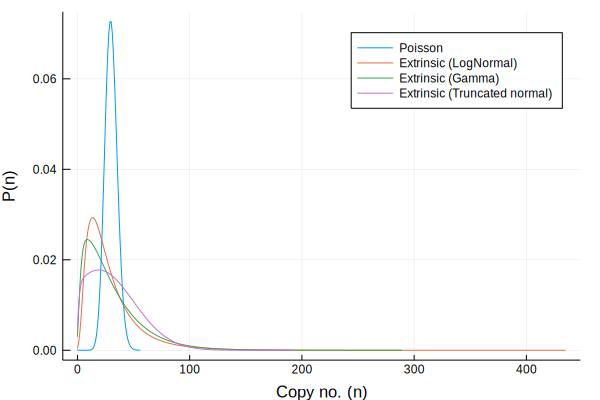

In [134]:
meanParams = [30.,1.,0.]
hyperParams = [25.0] # std deviation of variable parameter
parIndex = [1] # Choose only K variable
P = TxModels.solvemaster(meanParams)
plot(0:length(P)-1, P, label="Poisson", xlabel="Copy no. (n)",ylabel="P(n)")
@time Q = TxModels.solvecompound(meanParams,hyperParams,:LogNormal,parIndex, lTheta=100,cdfMax=0.9999)#,N=Integer(ceil(1.2*maximum(rnaData))))
plot!(0:length(Q)-1, Q, label="Extrinsic (LogNormal)")
@time Q2 = TxModels.solvecompound(meanParams,hyperParams,:Gamma,parIndex, lTheta=100,cdfMax=0.9999)#,N=Integer(ceil(1.2*maximum(rnaData))))
plot!(0:length(Q2)-1, Q2, label="Extrinsic (Gamma)")
@time Q3 = TxModels.solvecompound(meanParams,hyperParams,:Normal,parIndex, lTheta=100,cdfMax=0.9999)#,N=Integer(ceil(1.2*maximum(rnaData))))
plot!(0:length(Q3)-1, Q3, label="Extrinsic (Truncated normal)")

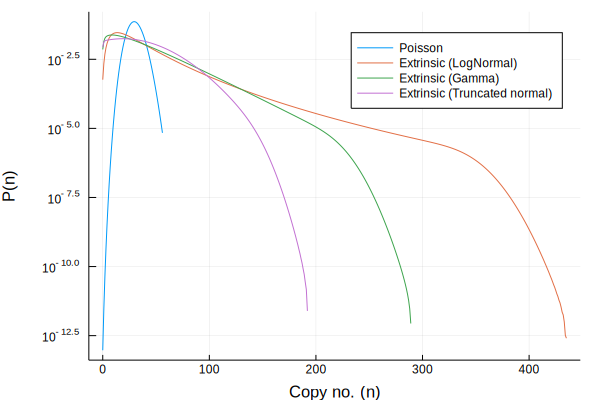

In [111]:
plot!(yscale=:log10)

## Mixing parameter
Examine the effect of having different parameters as variable.

  0.022354 seconds (175.74 k allocations: 5.170 MiB)
  0.028242 seconds (175.00 k allocations: 5.153 MiB)
  0.010328 seconds (124.51 k allocations: 3.328 MiB)


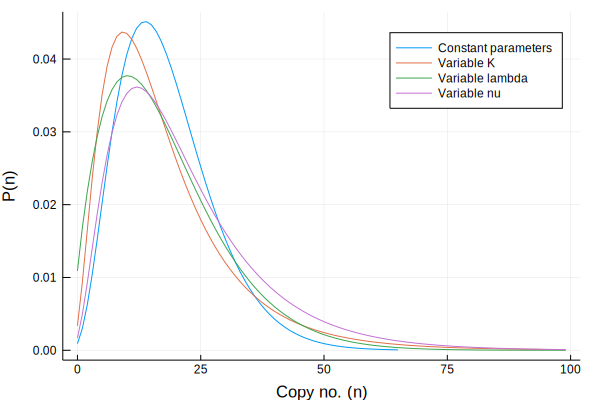

In [135]:
meanParams = [200.,4.0,40.0]
P = TxModels.solvemaster(meanParams)
plot(0:length(P)-1, P, label="Constant parameters", xlabel="Copy no. (n)",ylabel="P(n)")
@time Q = TxModels.solvecompound(meanParams,[100.0],:LogNormal,[1], lTheta=100,cdfMax=0.9999,N=100)
plot!(0:length(Q)-1, Q, label="Variable K")
@time Q2 = TxModels.solvecompound(meanParams,[2.0],:LogNormal,[2], lTheta=100,cdfMax=0.9999,N=100)
plot!(0:length(Q2)-1, Q2, label="Variable lambda")
@time Q3 = TxModels.solvecompound(meanParams,[20.0],:LogNormal,[3], lTheta=100,cdfMax=0.9999,N=100)
plot!(0:length(Q3)-1, Q3, label="Variable nu")

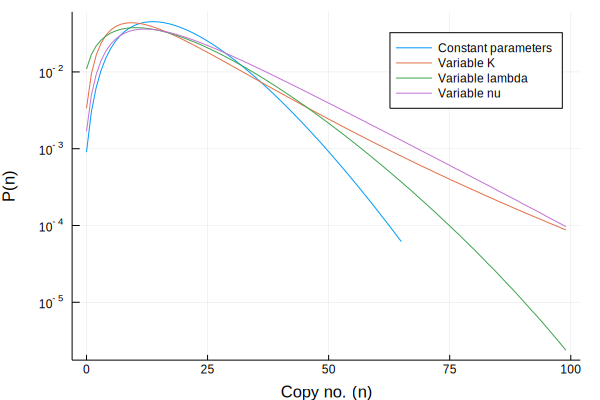

In [136]:
plot!(yscale=:log10)

## Multiple mixing parameters
Evaluate distribution with multiple variable parameters.

*Multiple integrations makes this very slow*

  0.021164 seconds (156.93 k allocations: 4.500 MiB)
243.300048 seconds (1.61 G allocations: 46.010 GiB, 9.18% gc time)


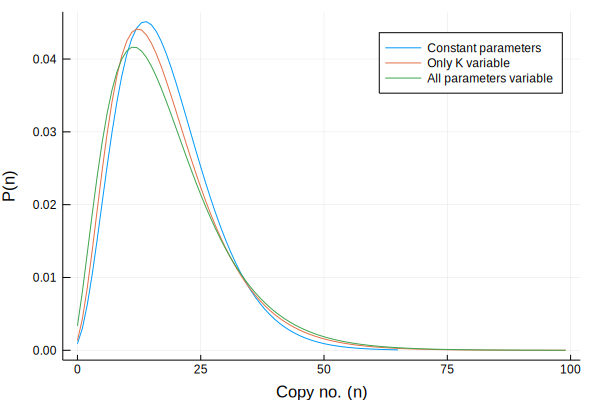

In [140]:
meanParams = [200.,4.0,40.0]
hyperParams = [50.0,1.0,1.0]
P = TxModels.solvemaster(meanParams)
plot(0:length(P)-1, P, label="Constant parameters", xlabel="Copy no. (n)",ylabel="P(n)")
@time Q = TxModels.solvecompound(meanParams,hyperParams[1:1],:LogNormal,[1], lTheta=100,cdfMax=0.9999,N=100)
plot!(0:length(Q)-1, Q, label="Only K variable")
@time Q = TxModels.solvecompound(meanParams,hyperParams,:LogNormal,[1,2,3], lTheta=100,cdfMax=0.9999,N=100)
plot!(0:length(Q)-1, Q, label="All parameters variable")

## Miscellaneous
Verify accuracy of the numerical integration against an analytical solution.
A poor match if *cdfMax* is too small.

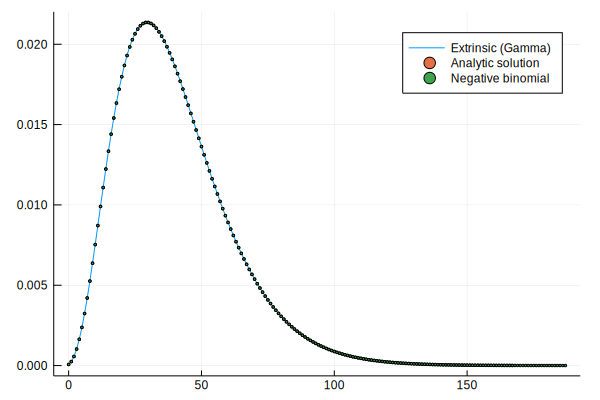

In [132]:
meanParams = [40.,1.,0.]
hyperParams = [20.0] # std deviation of variable parameter
Q = ModelInference.solvecompound(meanParams,hyperParams,:Gamma,[1], lTheta=100,cdfMax=0.999)
plot(0:length(Q)-1, Q, label="Extrinsic (Gamma)")

θ = hyperParams[1]^2/meanParams[1]
k = (meanParams[1]/hyperParams[1])^2

function func(m::Integer,z)
    tmp = 1.0
    for ii=0:m-1
        tmp *= z+ii
    end
    return tmp
end
q(n::Integer) = func(n,k)/(θ^(-n)*factorial(big(n))*(1+θ)^(n+k))
plot!(0:1:length(Q)-1, x->q(x), line=0,marker=1, label="Analytic solution")

d = NegativeBinomial(k,1/(1+θ))
plot!(0:1:length(Q)-1, x->pdf(d,x), line=0,marker=1, label="Negative binomial")
plot!()
